# Исключения

In [4]:
# Исключения - еще один тип данных
def show_fruit(fruit):
    if fruit == 'apple':
        print('ready to eat')
    elif fruit == 'orange':
        print('you need to peel first')
    else:
        raise ValueError('You need to pass correct fruit.')

In [5]:
show_fruit('orange')
show_fruit('apple')
show_fruit('APPLE')
show_fruit('carrot')

you need to peel first
ready to eat


ValueError: You need to pass correct fruit.

In [6]:
show_fruit('orange')
show_fruit('apple')
try:
    show_fruit('APPLE')
except:
    print('nope')
try:
    show_fruit('carrot')
except:
    print('nope')

you need to peel first
ready to eat
nope
nope


In [16]:
# Проблема в том, что с обычным try-except можно "отловить" не только те исключения,
# на которые мы рассчитывали.
show_fruit('orange')
show_fruit('apple')
try:
    show_fruit('APPLE')
except ValueError as err:
    print('nope,',err)
try:
    show_fruit('carrot')
except KeyError:
    print('nope')

you need to peel first
ready to eat
nope, You need to pass correct fruit.


ValueError: You need to pass correct fruit.

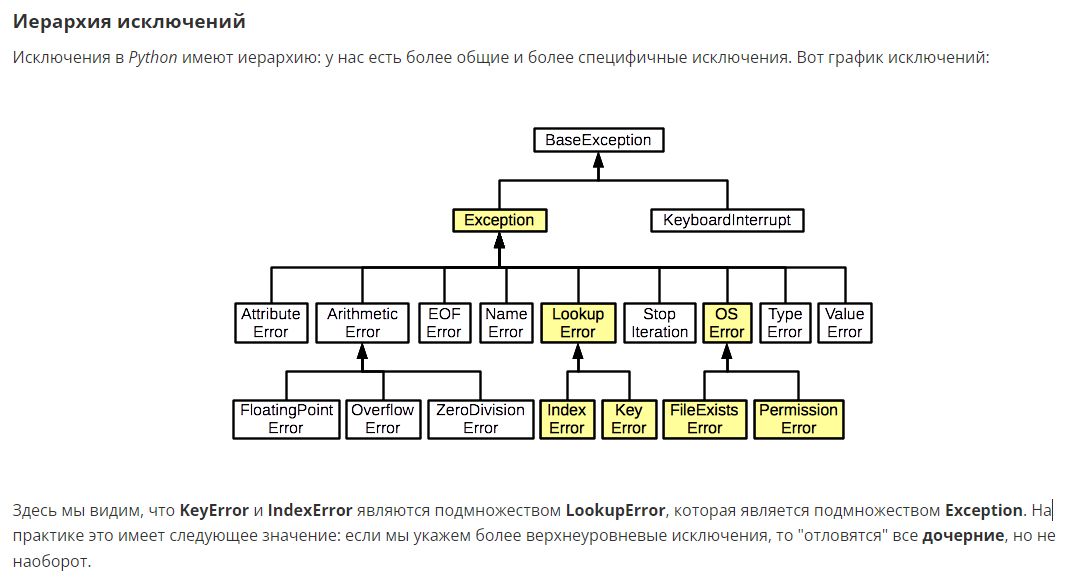

In [11]:
# Напишем функцию, которая сможет обращаться к спискам и словарям
# при этом не выбрасывая исключений из-за несуществующих индексов/ключей

def safe_element(collection, place):
    try:
        print(collection[place])
    except LookupError:
        print('Key or index not found')

users = ['Pavel', 'Elena', 'Sergey']
prices = {'apples':10, 'oranges':15, 'bananas':7}

safe_element(users,1)
safe_element(users,5)
safe_element(prices,'bananas')
safe_element(prices,'carrots')

Elena
Key or index not found
7
Key or index not found


In [13]:
def safe_sum(x, y):
    try:
        return x+y
    except TypeError:
        print(f"Can't sum {x} and {y}")
        return 0
    
safe_sum(1,2)
safe_sum(5,'a')

Can't sum 5 and a


0

In [17]:
# Ещё один распространённый подход: мы совершаем какое-то промежуточное действие,
# а потом перевыбрасываем исключение.

# пусть у нас есть функция, которая шлет разработчику письмо с ошибкой
def notify_admin(error):
    print('Mail to administrator has been sent about',error)
    
value = 'poem'

try:
    digitized = int(value)
except ValueError as err:
    notify_admin(err)
    raise err

Mail to administrator has been sent about invalid literal for int() with base 10: 'poem'


ValueError: invalid literal for int() with base 10: 'poem'

# Отладка

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('imdb.csv')
data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
976,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
977,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
978,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
979,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
980,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [3]:
data[data['Title'] == 'Suicide Squad'].Year

4    2016
Name: Year, dtype: int64

In [21]:
# Попробуем поместить данные в некое подобие таблицы

import csv

# функция, которая делает таблицу по данным из reader
def build_table(reader):
    table={}
    # инициализиуем столбцы
    headers = next(reader)
    for header in headers:
        table[header] = []
    
    # считываем данные
    for row in reader:
        for header in headers:
            table[header].append(row[header])
    
    return table

with open('imdb.csv', newline="") as csvfile:
    # делаем reader, который построчно берет данные из файла
    reader = csv.reader(csvfile)
    # строим таблицу
    imbd_table = build_table(reader)

TypeError: list indices must be integers or slices, not str

In [32]:
# Мы получили TypeError и сообщение, что индекс должен быть числом в 17 строке.
# Сразу может быть непонятно, почему это произошло, поэтому давайте посмотрим на данные:

# Попробуем поместить данные в некое подобие таблицы

import csv

# функция, которая делает таблицу по данным из reader
def build_table(reader):
    table={}
    # инициализиуем столбцы
    headers = next(reader)
    for header in headers:
        table[header] = []
    
    # считываем данные
    for row in reader:
        for header in headers:
            print('Header:',header)
            print('Table:',table)
            print('Row:',row)
            print('table[header]:',table[header])
            print('row[header]:',row[header])
            table[header].append(row[header])
    
    return table

with open('imdb.csv', newline="") as csvfile:
    # делаем reader, который построчно берет данные из файла
    reader = csv.reader(csvfile)
    # строим таблицу
    imbd_table = build_table(reader)

Header: Rank
Table: {'Rank': [], 'Title': [], 'Genre': [], 'Description': [], 'Director': [], 'Actors': [], 'Year': [], 'Runtime (Minutes)': [], 'Rating': [], 'Votes': [], 'Revenue (Millions)': [], 'Metascore': []}
Row: ['1', 'Guardians of the Galaxy', 'Action,Adventure,Sci-Fi', 'A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.', 'James Gunn', 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana', '2014', '121', '8.1', '757074', '333.13', '76']
table[header]: []


TypeError: list indices must be integers or slices, not str

Вот наша строка с ошибкой: table[header].append(row[header]). В ней мы видим два потенциальных места, где могла произойти ошибка, — table[header] и row[header]. Смотрим на данные, header — это строка "Rank". В словаре table есть ключ "Rank", значит, ошибка не там. Но row является списком, поэтому мы должны использовать численный индекс, а не строку. Исправим программу, чтобы передавался последовательный номер заголовка, а не он сам:

In [38]:
# Попробуем поместить данные в некое подобие таблицы

import csv

# функция, которая делает таблицу по данным из reader
def build_table(reader):
    table={}
    # инициализиуем столбцы
    headers = next(reader)
    for header in headers:
        table[header] = []
    
    # считываем данные
    for row in reader:
        for i,header in enumerate(headers):
            table[header].append(row[i])
    
    return table

with open('imdb.csv', newline="") as csvfile:
    # делаем reader, который построчно берет данные из файла
    reader = csv.reader(csvfile)
    # строим таблицу
    imdb_table = build_table(reader)

# выведем данные в полученной таблице
for header, values in imdb_table.items():
    print(header,values[:5])

Rank ['1', '2', '3', '4', '5']
Title ['Guardians of the Galaxy', 'Prometheus', 'Split', 'Sing', 'Suicide Squad']
Genre ['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi', 'Horror,Thriller', 'Animation,Comedy,Family', 'Action,Adventure,Fantasy']
Description ['A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.', 'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.', 'Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.', "In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.", 'A secret government agency recruits some of the most dangerous incarcerated super-villai

In [39]:
# В конце заметим, что print выводит строку без кавычек, что иногда затрудняет понимание данных.
print(5)
print('5')

5
5


In [40]:
# Быстрый способ обойти это — использовать метод repr().
# Он старается вывести объекты так, как они бы выглядели в самом коде:
print(repr(5))
print(repr('5'))

5
'5'


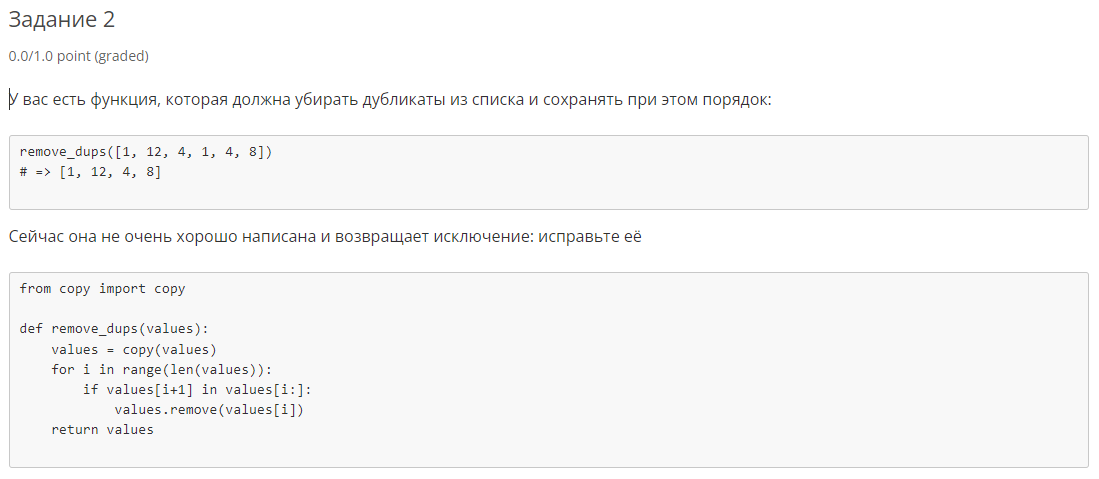

In [68]:
from copy import copy

def remove_dups(values):
    values = copy(values)
    for i in range(len(values)-1,-1,-1):
        if values[i] in values[:i]:
            values.pop(i)
    return values

remove_dups([1,12,4,1,4,8])

[1, 12, 4, 8]

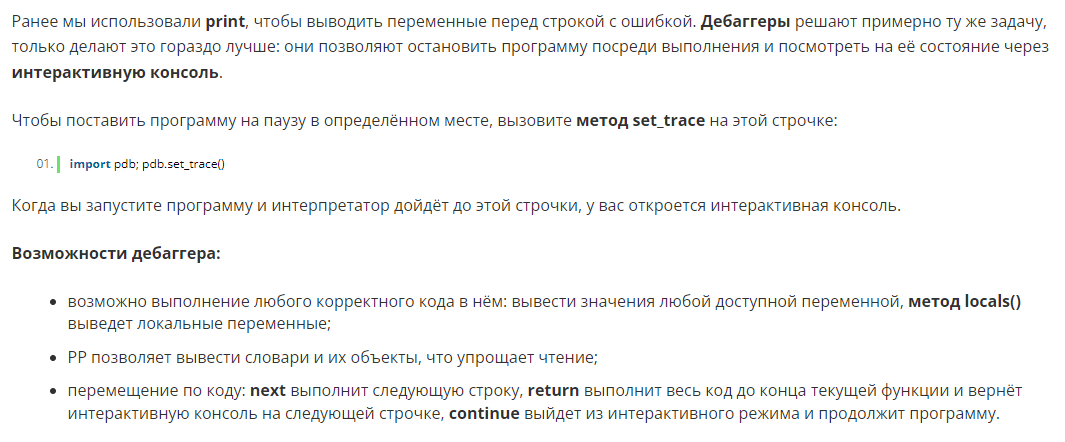

In [72]:
from collections import Counter

# считаем, сколько фильмов в каждом жанре
def count_genres(column):
    genres = []
    for movie_genre in column:
        splitted = movie_genre.split(',')
        genres.extend(splitted)
    counter = Counter(genres)
    
    return counter

print(dict(count_genres(data['Genre'])))

{'Action': 296, 'Adventure': 254, 'Sci-Fi': 117, 'Mystery': 103, 'Horror': 117, 'Thriller': 189, 'Animation': 49, 'Comedy': 277, 'Family': 51, 'Fantasy': 100, 'Drama': 501, 'Music': 16, 'Biography': 80, 'Romance': 138, 'History': 26, 'Crime': 146, 'Western': 7, 'War': 13, 'Musical': 5, 'Sport': 18}


Мы получили результат, но чтобы лучше понять, как мы это сделали, воспользуемся дебаггером. Для этого поставим вызов pdb.set_trace() в начале функции. Вызов дебаггера часто называют брейкпоинтом (breakpoint, точка прерывания), потому что программа ставится на паузу в этой точке.

In [73]:
from collections import Counter  
import pdb  
  
def count_genres(column):  
    genres = []  
    # ставим брейкпоинт в этом месте  
    pdb.set_trace()  
    for movie_genres in column:  
        splitted = movie_genres.split(",")  
        genres.extend(splitted)  
    counter = Counter(genres)  
      
    return counter   
   
print(count_genres(data["Genre"]))

> <ipython-input-73-7e8e400cbae6>(8)count_genres()
      6     # ставим брейкпоинт в этом месте
      7     pdb.set_trace()
----> 8     for movie_genres in column:
      9         splitted = movie_genres.split(",")
     10         genres.extend(splitted)

ipdb> help

Documented commands (type help <topic>):
EOF    cl         debug    ignore    n       pp       run          unalias  
a      clear      disable  interact  next    psource  rv           undisplay
alias  commands   display  j         p       q        s            unt      
args   condition  down     jump      pdef    quit     skip_hidden  until    
b      cont       enable   l         pdoc    r        source       up       
break  context    exit     list      pfile   restart  step         w        
bt     continue   h        ll        pinfo   return   tbreak       whatis   
c      d          help     longlist  pinfo2  retval   u            where    

Miscellaneous help topics:
exec  pdb

ipdb> genres
[]
ipdb> # попробуем вы

In [75]:
from copy import copy

def remove_dups(values):
    values = copy(values)
    pdb.set_trace()
    for i in range(len(values)):
        if values[i+1] in values[i:]:
            values.remove(values[i])
    return values

remove_dups([1,12,4,1,4,8])

> <ipython-input-75-0c138586798e>(6)remove_dups()
      4     values = copy(values)
      5     pdb.set_trace()
----> 6     for i in range(len(values)):
      7         if values[i+1] in values[i:]:
      8             values.remove(values[i])

ipdb> i,len(values),values,values[i+1],values[i:]
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8])
ipdb> i,len(values),values,values[i+1],values[i:],next
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8], <built-in function next>)
ipdb> i,len(values),values,values[i+1],values[i:],next
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8], <built-in function next>)
ipdb> i,len(values),values,values[i+1],values[i:],next
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8], <built-in function next>)
ipdb> i,len(values),values,values[i+1],values[i:],next
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8], <built-in function next>)
ipdb> i,len(values),values,values[i+1],values[i:],next
(0, 6, [1, 12, 4, 1, 4, 8], 12, [1, 12, 4, 1, 4, 8], <built-i

ipdb> i,len(values),values,values[i+1],values[i:]
(1, 4, [12, 1, 4, 8], 4, [1, 4, 8])
ipdb> n
> <ipython-input-75-0c138586798e>(7)remove_dups()
      5     pdb.set_trace()
      6     for i in range(len(values)):
----> 7         if values[i+1] in values[i:]:
      8             values.remove(values[i])
      9     return values

ipdb> i,len(values),values,values[i+1],values[i:]
(2, 4, [12, 1, 4, 8], 8, [4, 8])
ipdb> n
> <ipython-input-75-0c138586798e>(8)remove_dups()
      6     for i in range(len(values)):
      7         if values[i+1] in values[i:]:
----> 8             values.remove(values[i])
      9     return values
     10 

ipdb> i,len(values),values,values[i+1],values[i:]
(2, 4, [12, 1, 4, 8], 8, [4, 8])
ipdb> n
> <ipython-input-75-0c138586798e>(6)remove_dups()
      4     values = copy(values)
      5     pdb.set_trace()
----> 6     for i in range(len(values)):
      7         if values[i+1] in values[i:]:
      8             values.remove(values[i])

ipdb> i,len(values),valu

IndexError: list index out of range

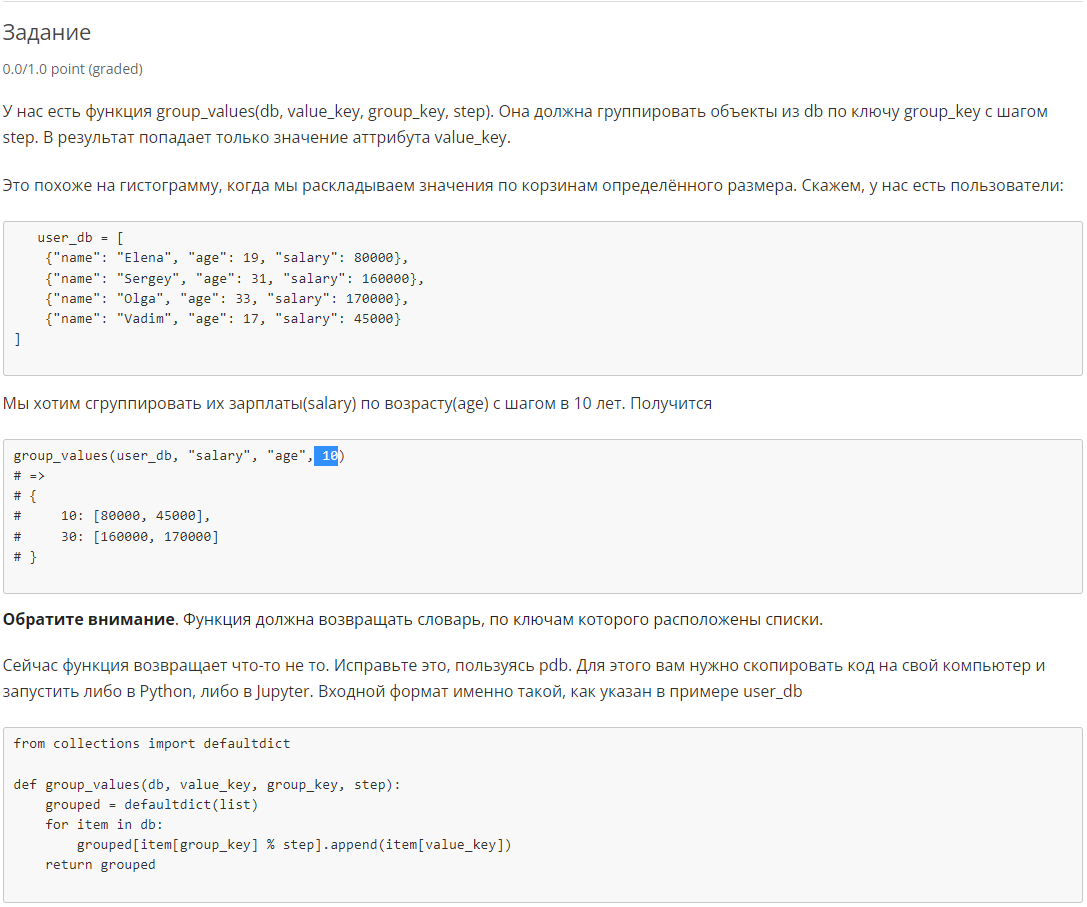

In [80]:
from collections import defaultdict

user_db = [
    {'name': 'Elena', 'age': 19, 'salary': 80000},
    {'name': 'Sergey', 'age': 31, 'salary': 160000},
    {'name': 'Olga', 'age': 33, 'salary': 170000},
    {'name': 'Vadim', 'age': 17, 'salary': 45000},
]

def group_values(db, value_key, group_key, step):
    grouped = defaultdict(list)
    #pdb.set_trace()
    for item in db:
        grouped[item[group_key]//step*step].append(item[value_key])
    return dict(grouped)

group_values(user_db, 'salary', 'age', 10)

{10: [80000, 45000], 30: [160000, 170000]}

# Автоматическое тестирование

In [91]:
pytest test_answer.py

SyntaxError: invalid syntax (<ipython-input-91-6457991767a1>, line 1)